# Image FFT shifting
See allso Check XIlinx FFT.ipynb

# Let's jsut check what a FFTSHIFT looks like


In [1]:
from pylab import *
import numpy as np
from astropy.io import fits
%matplotlib notebook

In [2]:
N = 16
v = np.arange(N*N).reshape(N,N)

def mkv(N):
    for i in range(N):
        for j in range(N):
            if j> i:
                v[i,j] = i*N+j
            elif j<i:
                v[i,j] = j*N+i
            else:
                v[i,j]= N*N
    return v



<IPython.core.display.Javascript object>


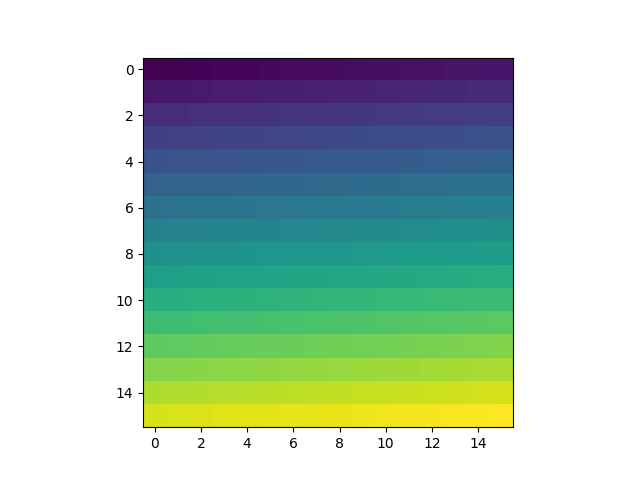

In [3]:
figure()
imshow(v)


<IPython.core.display.Javascript object>


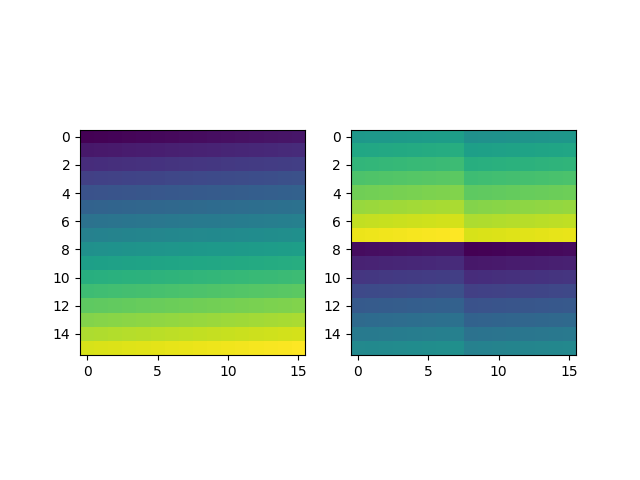

In [4]:
fig, ax = subplots(1,2)
ax[0].imshow(v)
ax[1].imshow(np.fft.fftshift(v))

# Run HW gridding in SW for small number of antennas to see what's going on

In [5]:
from craco.search_pipeline import location2pix, get_grid_lut_from_plan, grid_candidates,wait_for_starts,waitall,print_candidates
from craco.search_pipeline import NBINARY_POINT_FDMTIN 
import craco
import craco.search_pipeline
from craco.pyxrtutil import *
import craft.craco_plan

from craft import uvfits

from craft.craco_plan import PipelinePlan
from craft.craco import printstats
import logging
import time

In [6]:
fits='/data/craco/ban115/test_data/frb_d0_t0_a1_sninf_lm00/frb_d0_t0_a1_sninf_lm00.fits'
#fits='/data/craco/ban115/test_data/nant3/frb_d0_t0_a1_sninf_lm00/frb_d0_t0_a1_sninf_lm00.fits'
values = craco.search_pipeline.get_parser().parse_args([])
print(values)
f = uvfits.open(fits)
plan = PipelinePlan(f, "--ndm 2 --max-nbl 3 ")

Namespace(boxcar_weight='sum', cand_file='candidates.txt', cell=None, device=0, dump_boxcar_hist_buf=None, dump_candidates=None, dump_fdmt_hist_buf=None, dump_mainbufs=None, dump_uvdata=None, fdmt_scale=1.0, fft_scale=10.0, fft_shift1=0, fft_shift2=0, injection_file=None, input_scale=1.0, max_ndm=1024, nblocks=None, nbox=8, ncin=32, ndm=512, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', run_fdmt=True, run_image=True, show=False, show_candidate_grid=None, threshold=10.0, uv='frb_d0_lm0_nt16_nant24.fits', verbose=False, wait=False, xclbin='binary_container_1.xclbin.golden')
parsing values --ndm 2 --max-nbl 3 
(1, 3) (255, 253) 28.79155498999353 87.60480204005107 1.2043004108155837 3.009387956154332
Cell blid=258.0 chan=0-119 freq=735499993.944000-854499999.596500 uvpix=(1, 3) upper_idx=32892 uvpix_upper=(255, 253)
(1, 4) (255, 252) 28.79155498999353 87.60480204005107 1.2043004108155837 3.009387956154332
Cell blid=258.0 chan=120-180 freq=855499999.644000-915500002.494

/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=515.0 uvpix=(254, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} uvpix={uvpix}')
/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=515.0 uvpix=(253, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} uvpix={uvpix}')
/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=260.0 uvpix=(253, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} uvpix={uvpix}')
/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=1029.0 uvpix=(0, 251)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} uvpix={uvpix}')
/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=1029.0 uvpix=(0, 250)
  warnings.warn(f

735.3354344835201 13.047588699362493 25.2601404116697
Cell blid=1287.0 chan=153-181 freq=888500001.211500-916500002.541500 uvpix=(16, 31) upper_idx=32415 uvpix_upper=(240, 225)
(16, 32) (240, 224) 311.93244156589327 735.3354344835201 13.047588699362493 25.2601404116697
Cell blid=1287.0 chan=182-194 freq=917500002.589000-929500003.159000 uvpix=(16, 32) upper_idx=32384 uvpix_upper=(240, 224)
(17, 32) (239, 224) 311.93244156589327 735.3354344835201 13.047588699362493 25.2601404116697
Cell blid=1287.0 chan=195-210 freq=930500003.206500-945500003.919000 uvpix=(17, 32) upper_idx=32383 uvpix_upper=(239, 224)
(17, 33) (239, 223) 311.93244156589327 735.3354344835201 13.047588699362493 25.2601404116697
Cell blid=1287.0 chan=211-239 freq=946500003.966500-974500005.296500 uvpix=(17, 33) upper_idx=32351 uvpix_upper=(239, 223)
(17, 34) (239, 222) 311.93244156589327 735.3354344835201 13.047588699362493 25.2601404116697
Cell blid=1287.0 chan=240-250 freq=975500005.344000-985500005.819000 uvpix=(17, 34

/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=1545.0 uvpix=(0, 228)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} uvpix={uvpix}')
/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=1545.0 uvpix=(0, 227)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} uvpix={uvpix}')
/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=1545.0 uvpix=(0, 226)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} uvpix={uvpix}')
/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=1545.0 uvpix=(0, 225)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} uvpix={uvpix}')
/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=1545.0 uvpix=(0, 224)
  warnings.war

 (36, 32) -858.5966050208635 -927.0770677694312 -35.91359495903781 -31.846822288311323
Cell blid=1802.0 chan=0-12 freq=735499993.944000-747499994.514000 uvpix=(220, 224) upper_idx=7700 uvpix_upper=(36, 32)
(219, 224) (37, 32) -858.5966050208635 -927.0770677694312 -35.91359495903781 -31.846822288311323
Cell blid=1802.0 chan=13-15 freq=748499994.561500-750499994.656500 uvpix=(219, 224) upper_idx=7701 uvpix_upper=(37, 32)
(219, 223) (37, 33) -858.5966050208635 -927.0770677694312 -35.91359495903781 -31.846822288311323
Cell blid=1802.0 chan=16-32 freq=751499994.704000-767499995.464000 uvpix=(219, 223) upper_idx=7924 uvpix_upper=(37, 33)
(218, 223) (38, 33) -858.5966050208635 -927.0770677694312 -35.91359495903781 -31.846822288311323
Cell blid=1802.0 chan=33-38 freq=768499995.511500-773499995.749000 uvpix=(218, 223) upper_idx=7925 uvpix_upper=(38, 33)
(218, 222) (38, 34) -858.5966050208635 -927.0770677694312 -35.91359495903781 -31.846822288311323
Cell blid=1802.0 chan=39-52 freq=774499995.796

Cell blid=1548.0 chan=117-158 freq=852499999.501500-893500001.449000 uvpix=(239, 18) upper_idx=4676 uvpix_upper=(239, 18)
(18, 238) (238, 18) -344.1844985101374 439.9247268211322 -14.396635857152338 15.112232933358365
Cell blid=1548.0 chan=159-164 freq=894500001.496500-899500001.734000 uvpix=(238, 18) upper_idx=4675 uvpix_upper=(238, 18)
(18, 237) (238, 19) -344.1844985101374 439.9247268211322 -14.396635857152338 15.112232933358365
Cell blid=1548.0 chan=165-209 freq=900500001.781500-944500003.871500 uvpix=(238, 19) upper_idx=4912 uvpix_upper=(238, 19)
(19, 237) (237, 19) -344.1844985101374 439.9247268211322 -14.396635857152338 15.112232933358365
Cell blid=1548.0 chan=210-213 freq=945500003.919000-948500004.061500 uvpix=(237, 19) upper_idx=4911 uvpix_upper=(237, 19)
(19, 236) (237, 20) -344.1844985101374 439.9247268211322 -14.396635857152338 15.112232933358365
Cell blid=1548.0 chan=214-255 freq=949500004.109000-990500006.056500 uvpix=(237, 20) upper_idx=5147 uvpix_upper=(237, 20)
(35, 2

Cell blid=2061.0 chan=131-150 freq=866500000.166500-885500001.069000 uvpix=(14, 43) upper_idx=31979 uvpix_upper=(242, 213)
(14, 44) (242, 212) 280.32511094377736 1050.7079075980175 11.725509316493886 36.093771676077736
Cell blid=2061.0 chan=151-171 freq=886500001.116500-906500002.066500 uvpix=(14, 44) upper_idx=31936 uvpix_upper=(242, 212)
(14, 45) (242, 211) 280.32511094377736 1050.7079075980175 11.725509316493886 36.093771676077736
Cell blid=2061.0 chan=172-174 freq=907500002.114000-909500002.209000 uvpix=(14, 45) upper_idx=31892 uvpix_upper=(242, 211)
(15, 45) (241, 211) 280.32511094377736 1050.7079075980175 11.725509316493886 36.093771676077736
Cell blid=2061.0 chan=175-191 freq=910500002.256500-926500003.016500 uvpix=(15, 45) upper_idx=31891 uvpix_upper=(241, 211)
(15, 46) (241, 210) 280.32511094377736 1050.7079075980175 11.725509316493886 36.093771676077736
Cell blid=2061.0 chan=192-212 freq=927500003.064000-947500004.014000 uvpix=(15, 46) upper_idx=31846 uvpix_upper=(241, 210)
(

/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=1550.0 uvpix=(53, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} uvpix={uvpix}')
/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=1550.0 uvpix=(54, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} uvpix={uvpix}')
/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=1550.0 uvpix=(55, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} uvpix={uvpix}')
/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=1550.0 uvpix=(56, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} uvpix={uvpix}')
/data/craco/ban115/craft-github/src/craft/craco_plan.py:126: UserWarning: Cannot grid things on U=0 or V=0 blid=1550.0 uvpix=(57, 0)
  warnings.warn(f'C

 27.189810768704618
Cell blid=2318.0 chan=57-62 freq=792499996.651500-797499996.889000 uvpix=(57, 29) upper_idx=7046 uvpix_upper=(57, 29)
(199, 226) (57, 30) 1253.6178012062226 791.5091123521004 52.436641005429834 27.189810768704618
Cell blid=2318.0 chan=63-71 freq=798499996.936500-806499997.316500 uvpix=(57, 30) upper_idx=7272 uvpix_upper=(57, 30)
(198, 226) (58, 30) 1253.6178012062226 791.5091123521004 52.436641005429834 27.189810768704618
Cell blid=2318.0 chan=72-85 freq=807499997.364000-820499997.981500 uvpix=(58, 30) upper_idx=7273 uvpix_upper=(58, 30)
(197, 226) (59, 30) 1253.6178012062226 791.5091123521004 52.436641005429834 27.189810768704618
Cell blid=2318.0 chan=86-89 freq=821499998.029000-824499998.171500 uvpix=(59, 30) upper_idx=7274 uvpix_upper=(59, 30)
(197, 225) (59, 31) 1253.6178012062226 791.5091123521004 52.436641005429834 27.189810768704618
Cell blid=2318.0 chan=90-99 freq=825499998.219000-834499998.646500 uvpix=(59, 31) upper_idx=7499 uvpix_upper=(59, 31)
(196, 225)

(8, 51) (248, 205) -185.52469217789107 -1483.4854578745594 -7.760173532965513 -50.96048579639244
Cell blid=2063.0 chan=0-7 freq=735499993.944000-742499994.276500 uvpix=(248, 205) upper_idx=31613 uvpix_upper=(248, 205)
(8, 52) (248, 204) -185.52469217789107 -1483.4854578745594 -7.760173532965513 -50.96048579639244
Cell blid=2063.0 chan=8-22 freq=743499994.324000-757499994.989000 uvpix=(248, 204) upper_idx=31562 uvpix_upper=(248, 204)
(8, 53) (248, 203) -185.52469217789107 -1483.4854578745594 -7.760173532965513 -50.96048579639244
Cell blid=2063.0 chan=23-36 freq=758499995.036500-771499995.654000 uvpix=(248, 203) upper_idx=31510 uvpix_upper=(248, 203)
(8, 54) (248, 202) -185.52469217789107 -1483.4854578745594 -7.760173532965513 -50.96048579639244
Cell blid=2063.0 chan=37-51 freq=772499995.701500-786499996.366500 uvpix=(248, 202) upper_idx=31457 uvpix_upper=(248, 202)
(8, 55) (248, 201) -185.52469217789107 -1483.4854578745594 -7.760173532965513 -50.96048579639244
Cell blid=2063.0 chan=52-6

(46, 72) (210, 184) -838.7371445626096 -1582.5613432277585 -35.082908447080975 -54.363926808575
Cell blid=528.0 chan=232-239 freq=967500004.964000-974500005.296500 uvpix=(210, 184) upper_idx=30294 uvpix_upper=(210, 184)
(47, 72) (209, 184) -838.7371445626096 -1582.5613432277585 -35.082908447080975 -54.363926808575
Cell blid=528.0 chan=240-245 freq=975500005.344000-980500005.581500 uvpix=(209, 184) upper_idx=30293 uvpix_upper=(209, 184)
(47, 73) (209, 183) -838.7371445626096 -1582.5613432277585 -35.082908447080975 -54.363926808575
Cell blid=528.0 chan=246-255 freq=981500005.629000-990500006.056500 uvpix=(209, 183) upper_idx=30221 uvpix_upper=(209, 183)
(33, 55) (223, 201) -793.1116258030551 -1589.4398176082664 -33.17447276151615 -54.60021520230887
Cell blid=784.0 chan=0-7 freq=735499993.944000-742499994.276500 uvpix=(223, 201) upper_idx=31378 uvpix_upper=(223, 201)
(34, 55) (222, 201) -793.1116258030551 -1589.4398176082664 -33.17447276151615 -54.60021520230887
Cell blid=784.0 chan=8-12 

(9, 77) (247, 179) -218.52083295055587 -2173.216612232313 -9.140344416464501 -74.65403432994994
Cell blid=3088.0 chan=19-28 freq=754499994.846500-763499995.274000 uvpix=(247, 179) upper_idx=29961 uvpix_upper=(247, 179)
(10, 78) (246, 178) -218.52083295055587 -2173.216612232313 -9.140344416464501 -74.65403432994994
Cell blid=3088.0 chan=29-37 freq=764499995.321500-772499995.701500 uvpix=(246, 178) upper_idx=29883 uvpix_upper=(246, 178)
(10, 79) (246, 177) -218.52083295055587 -2173.216612232313 -9.140344416464501 -74.65403432994994
Cell blid=3088.0 chan=38-47 freq=773499995.749000-782499996.176500 uvpix=(246, 177) upper_idx=29805 uvpix_upper=(246, 177)
(10, 80) (246, 176) -218.52083295055587 -2173.216612232313 -9.140344416464501 -74.65403432994994
Cell blid=3088.0 chan=48-57 freq=783499996.224000-792499996.651500 uvpix=(246, 176) upper_idx=29726 uvpix_upper=(246, 176)
(10, 81) (246, 175) -218.52083295055587 -2173.216612232313 -9.140344416464501 -74.65403432994994
Cell blid=3088.0 chan=58

(198, 199) (58, 57) -1077.1559434472433 -1288.151150811778 -45.055549992239385 -44.25038889063447
Cell blid=1041.0 chan=204-219 freq=939500003.634000-954500004.346500 uvpix=(198, 199) upper_idx=12997 uvpix_upper=(58, 57)
(197, 199) (59, 57) -1077.1559434472433 -1288.151150811778 -45.055549992239385 -44.25038889063447
Cell blid=1041.0 chan=220-220 freq=955500004.394000-955500004.394000 uvpix=(197, 199) upper_idx=12998 uvpix_upper=(59, 57)
(197, 198) (59, 58) -1077.1559434472433 -1288.151150811778 -45.055549992239385 -44.25038889063447
Cell blid=1041.0 chan=221-235 freq=956500004.441500-970500005.106500 uvpix=(197, 198) upper_idx=13196 uvpix_upper=(59, 58)
(196, 198) (60, 58) -1077.1559434472433 -1288.151150811778 -45.055549992239385 -44.25038889063447
Cell blid=1041.0 chan=236-236 freq=971500005.154000-971500005.154000 uvpix=(196, 198) upper_idx=13197 uvpix_upper=(60, 58)
(196, 197) (60, 59) -1077.1559434472433 -1288.151150811778 -45.055549992239385 -44.25038889063447
Cell blid=1041.0 c

(99, 102) (157, 154) -1958.3092318007384 -2442.5281745946068 -81.91265158068872 -83.90538760457599
Cell blid=3345.0 chan=155-157 freq=890500001.306500-892500001.401500 uvpix=(157, 154) upper_idx=27646 uvpix_upper=(157, 154)
(100, 102) (156, 154) -1958.3092318007384 -2442.5281745946068 -81.91265158068872 -83.90538760457599
Cell blid=3345.0 chan=158-162 freq=893500001.449000-897500001.639000 uvpix=(156, 154) upper_idx=27645 uvpix_upper=(156, 154)
(100, 103) (156, 153) -1958.3092318007384 -2442.5281745946068 -81.91265158068872 -83.90538760457599
Cell blid=3345.0 chan=163-166 freq=898500001.686500-901500001.829000 uvpix=(156, 153) upper_idx=27543 uvpix_upper=(156, 153)
(101, 103) (155, 153) -1958.3092318007384 -2442.5281745946068 -81.91265158068872 -83.90538760457599
Cell blid=3345.0 chan=167-171 freq=902500001.876500-906500002.066500 uvpix=(155, 153) upper_idx=27542 uvpix_upper=(155, 153)
(101, 104) (155, 152) -1958.3092318007384 -2442.5281745946068 -81.91265158068872 -83.90538760457599
C

(3, 27) (253, 229) -79.26721679499022 -789.5728011606703 -3.3156091007794544 -27.123294876388666
Cell blid=2834.0 chan=0-10 freq=735499993.944000-745499994.419000 uvpix=(253, 229) upper_idx=32542 uvpix_upper=(253, 229)
(3, 28) (253, 228) -79.26721679499022 -789.5728011606703 -3.3156091007794544 -27.123294876388666
Cell blid=2834.0 chan=11-37 freq=746499994.466500-772499995.701500 uvpix=(253, 228) upper_idx=32515 uvpix_upper=(253, 228)
(3, 29) (253, 227) -79.26721679499022 -789.5728011606703 -3.3156091007794544 -27.123294876388666
Cell blid=2834.0 chan=38-40 freq=773499995.749000-775499995.844000 uvpix=(253, 227) upper_idx=32487 uvpix_upper=(253, 227)
(4, 29) (252, 227) -79.26721679499022 -789.5728011606703 -3.3156091007794544 -27.123294876388666
Cell blid=2834.0 chan=41-64 freq=776499995.891500-799499996.984000 uvpix=(252, 227) upper_idx=32486 uvpix_upper=(252, 227)
(4, 30) (252, 226) -79.26721679499022 -789.5728011606703 -3.3156091007794544 -27.123294876388666
Cell blid=2834.0 chan=65

(72, 252) (184, 4) -1582.944307569286 98.20254060742937 -66.211793026338 3.373439995134568
Cell blid=2067.0 chan=59-69 freq=794499996.746500-804499997.221500 uvpix=(184, 4) upper_idx=1198 uvpix_upper=(184, 4)
(73, 252) (183, 4) -1582.944307569286 98.20254060742937 -66.211793026338 3.373439995134568
Cell blid=2067.0 chan=70-80 freq=805499997.269000-815499997.744000 uvpix=(183, 4) upper_idx=1197 uvpix_upper=(183, 4)
(74, 252) (182, 4) -1582.944307569286 98.20254060742937 -66.211793026338 3.373439995134568
Cell blid=2067.0 chan=81-92 freq=816499997.791500-827499998.314000 uvpix=(182, 4) upper_idx=1196 uvpix_upper=(182, 4)
(75, 252) (181, 4) -1582.944307569286 98.20254060742937 -66.211793026338 3.373439995134568
Cell blid=2067.0 chan=93-103 freq=828499998.361500-838499998.836500 uvpix=(181, 4) upper_idx=1195 uvpix_upper=(181, 4)
(76, 252) (180, 4) -1582.944307569286 98.20254060742937 -66.211793026338 3.373439995134568
Cell blid=2067.0 chan=104-114 freq=839499998.884000-849499999.359000 uvp

Cell blid=276.0 chan=118-130 freq=853499999.549000-865500000.119000 uvpix=(222, 35) upper_idx=8552 uvpix_upper=(222, 35)
(34, 220) (222, 36) -690.9200997665258 877.7787704646258 -28.899979882252207 30.15333404664883
Cell blid=276.0 chan=131-142 freq=866500000.166500-877500000.689000 uvpix=(222, 36) upper_idx=8772 uvpix_upper=(222, 36)
(35, 220) (221, 36) -690.9200997665258 877.7787704646258 -28.899979882252207 30.15333404664883
Cell blid=276.0 chan=143-154 freq=878500000.736500-889500001.259000 uvpix=(221, 36) upper_idx=8771 uvpix_upper=(221, 36)
(35, 219) (221, 37) -690.9200997665258 877.7787704646258 -28.899979882252207 30.15333404664883
Cell blid=276.0 chan=155-167 freq=890500001.306500-902500001.876500 uvpix=(221, 37) upper_idx=8990 uvpix_upper=(221, 37)
(36, 219) (220, 37) -690.9200997665258 877.7787704646258 -28.899979882252207 30.15333404664883
Cell blid=276.0 chan=168-179 freq=903500001.924000-914500002.446500 uvpix=(220, 37) upper_idx=8989 uvpix_upper=(220, 37)
(36, 218) (220,

(5, 82) (251, 174) 119.02543231963065 2372.7353482346257 4.9786257494550785 81.50787415573932
Cell blid=4116.0 chan=0-8 freq=735499993.944000-743499994.324000 uvpix=(5, 82) upper_idx=29570 uvpix_upper=(251, 174)
(5, 83) (251, 173) 119.02543231963065 2372.7353482346257 4.9786257494550785 81.50787415573932
Cell blid=4116.0 chan=9-17 freq=744499994.371500-752499994.751500 uvpix=(5, 83) upper_idx=29488 uvpix_upper=(251, 173)
(5, 84) (251, 172) 119.02543231963065 2372.7353482346257 4.9786257494550785 81.50787415573932
Cell blid=4116.0 chan=18-26 freq=753499994.799000-761499995.179000 uvpix=(5, 84) upper_idx=29405 uvpix_upper=(251, 172)
(5, 85) (251, 171) 119.02543231963065 2372.7353482346257 4.9786257494550785 81.50787415573932
Cell blid=4116.0 chan=27-36 freq=762499995.226500-771499995.654000 uvpix=(5, 85) upper_idx=29321 uvpix_upper=(251, 171)
(5, 86) (251, 170) 119.02543231963065 2372.7353482346257 4.9786257494550785 81.50787415573932
Cell blid=4116.0 chan=37-45 freq=772499995.701500-780

Upper registers [(3, 1), (4, 1), (34, 2), (35, 2), (36, 2), (37, 2), (38, 2), (39, 2), (40, 2), (41, 2), (42, 2), (43, 2), (44, 2), (45, 2), (46, 2), (87, 2), (88, 2), (89, 2), (90, 2), (91, 2), (92, 2), (93, 2), (94, 2), (95, 2), (96, 2), (97, 2), (98, 2), (99, 2), (100, 2), (101, 2), (102, 2), (103, 2)]
Lower registers [(1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (4, 7), (2, 8), (4, 8), (2, 9), (3, 9), (4, 9), (5, 9), (3, 10), (5, 10), (7, 10), (3, 11), (5, 11), (6, 11), (7, 11), (7, 12), (8, 12), (8, 13), (9, 13), (7, 14), (8, 14), (9, 14), (8, 15), (8, 16), (9, 16), (2, 17)]


In [7]:
def pointsource(amp, lm, plan, noiseamp=0):
    '''
    Returns simulted visibilities for a point source with given amplitude at given value of lm =(l, m) in radians
    offset from the phase center
        
    :amp: amplitude
    :lm: tuple of l,m in radians
    :plan: craco_plan to get all the goodies like UVWs and stuff from
    :noiseamp: add nois with tgiven ampliutude
    :returns: np.array of complex dtype with shape (nbl, nchan)
    '''
    nbl = plan.nbl
    freqs = plan.freqs
    nf = len(freqs)
    assert np.all(freqs > 500e6), 'Invalid frequencies'
    
    l, m = lm
    dout = np.empty((nbl, nf), dtype=np.complex64)
    for ibl, blid in enumerate(plan.baseline_order):       
        # baselines in seconds
        uvw_sec = np.array(plan.baselines[blid][:3])
        
        # convert UVW coordinates to wavelegths
        u = uvw_sec[0]*freqs
        v = uvw_sec[1]*freqs
        w = uvw_sec[2]*freqs


        # TMS equation 3.7 - don't include 1/sqrt(1 - l*l - m*m) denomiator term for point sources
        vis = amp*np.exp(-2j*np.pi*(u*l + v*m + w*(np.sqrt(1.0 - l*l - m*m) - 1)))
        if noiseamp > 0:
            vishape = vis.shape
            noise = noiseamp*(np.random.randn(*vishape) + 1j*np.random.randn(*vishape))
            vis += noise

        dout[ibl, :] = vis

    return dout

<IPython.core.display.Javascript object>


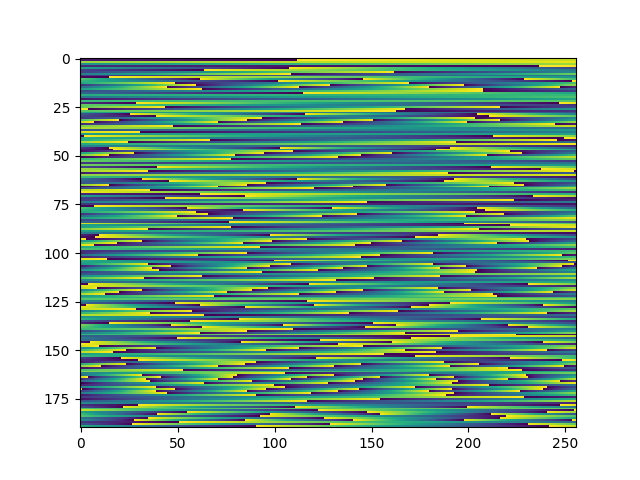

In [8]:
dpoint = pointsource(1,(np.radians(0.2), np.radians(0.3)),plan)
figure()
imshow(np.angle(dpoint), aspect='auto', interpolation='none')

In [9]:
import craco_pybind11
import craco_pybind11.ddgrid_reader
import craco_pybind11.grid
nchunk_time = plan.nchunk_time
nchunk_time = 1
nparallel_uvin, nparallel_uvout, h_nparallel_uvout, lut = get_grid_lut_from_plan(plan)
nuvrest = nparallel_uvin*2//8
NUVWIDE = 8
OUTPUT_NT = 2
OUTPUT_NUV = 2
ncu = 4
ndm = plan.nd
tblk = 0
do_load_lut = 1


In [10]:
nchunk_time

1

In [11]:
outputs = np.zeros((ncu, ndm, nchunk_time, nuvrest, NUVWIDE//OUTPUT_NUV, OUTPUT_NT, OUTPUT_NUV, 2), dtype=np.int16)

In [12]:
mainbuf_shape = (664, 186, 11, 256, 8, 2)
mainbuf = np.zeros(mainbuf_shape, dtype=np.int16)


In [13]:
mainbuf[:]= 0
mainbuf_hw = mainbuf.copy()
npix = 256
blid_grid = np.zeros((npix,npix))
for irun, r in enumerate(plan.fdmt_plan.runs):
    for icell, c in enumerate(r.cells):
        #print(c.uvpix, c.nchan)
        blid = c.blid
        ibl = np.where(plan.baseline_order == blid)[0][0]
        assert plan.baseline_order[ibl] == blid
        v = dpoint[ibl, c.chan_slice].sum()
        mainbuf[irun, 0, 0, 0, icell, :] = (v.real, v.imag) #c.nchan
        
        if c.is_lower:
            v = v.conj()
        
        mainbuf_hw[irun, 0, 0, 0, icell, :] = (v.real, v.imag) #c.nchan
        print(irun, icell, blid, ibl, v, c.is_upper, c.chan_slice, c, c.uvpix_upper, c.uvpix_lower)
    
        blid_grid[c.uvpix[1], c.uvpix[0]] = blid
        
        #pass
        
        
#mainbuf.sum()
#mainbuf[:,0,0,:,:,0] = 1

0 0 3092.0 161 (-8.291409+30.857597j) True slice(0, 32, None) Cell blid=3092.0 chan=0-31 freq=735499993.944000-766499995.416500 uvpix=(252, 7) upper_idx=2016 uvpix_upper=(252, 7) (252, 7) (4, 249)
0 1 2578.0 142 (14.711235-28.269958j) False slice(0, 32, None) Cell blid=2578.0 chan=0-31 freq=735499993.944000-766499995.416500 uvpix=(247, 253) upper_idx=771 uvpix_upper=(9, 3) (9, 3) (247, 253)
0 2 2314.0 124 (2.6490467+31.884792j) True slice(0, 32, None) Cell blid=2314.0 chan=0-31 freq=735499993.944000-766499995.416500 uvpix=(240, 7) upper_idx=2004 uvpix_upper=(240, 7) (240, 7) (16, 249)
0 3 1030.0 55 (-2.1137242+31.87782j) True slice(0, 32, None) Cell blid=1030.0 chan=0-31 freq=735499993.944000-766499995.416500 uvpix=(249, 9) upper_idx=2508 uvpix_upper=(249, 9) (249, 9) (7, 247)
0 4 774.0 39 (29.987251+11.16893j) True slice(0, 32, None) Cell blid=774.0 chan=0-31 freq=735499993.944000-766499995.416500 uvpix=(246, 5) upper_idx=1511 uvpix_upper=(246, 5) (246, 5) (10, 251)
0 5 772.0 37 (9.14

27 6 4372.0 186 (3.1490216+8.960848j) False slice(6, 16, None) Cell blid=4372.0 chan=6-15 freq=741499994.229000-750499994.656500 uvpix=(20, 76) upper_idx=30026 uvpix_upper=(236, 180) (236, 180) (20, 76)
27 7 4372.0 186 (-6.6358414+6.7954955j) False slice(16, 26, None) Cell blid=4372.0 chan=16-25 freq=751499994.704000-760499995.131500 uvpix=(20, 77) upper_idx=29950 uvpix_upper=(236, 179) (236, 179) (20, 77)
28 0 4115.0 182 (3.071844-9.319276j) True slice(22, 32, None) Cell blid=4115.0 chan=22-31 freq=757499994.989000-766499995.416500 uvpix=(245, 60) upper_idx=13775 uvpix_upper=(245, 60) (245, 60) (11, 196)
28 1 3860.0 179 (-9.618775-1.8536773j) True slice(14, 24, None) Cell blid=3860.0 chan=14-23 freq=749499994.609000-758499995.036500 uvpix=(212, 80) upper_idx=17452 uvpix_upper=(212, 80) (212, 80) (44, 176)
28 2 3859.0 178 (-9.65906-2.4539843j) True slice(16, 26, None) Cell blid=3859.0 chan=16-25 freq=751499994.704000-760499995.131500 uvpix=(196, 56) upper_idx=12936 uvpix_upper=(196, 56

50 2 1544.0 86 (5.3969975-2.6161287j) False slice(0, 6, None) Cell blid=1544.0 chan=0-5 freq=735499993.944000-740499994.181500 uvpix=(32, 251) upper_idx=1489 uvpix_upper=(224, 5) (224, 5) (32, 251)
50 3 1294.0 78 (3.8276553+4.59221j) True slice(0, 6, None) Cell blid=1294.0 chan=0-5 freq=735499993.944000-740499994.181500 uvpix=(45, 14) upper_idx=3524 uvpix_upper=(45, 14) (45, 14) (211, 242)
50 4 1293.0 77 (2.155145-5.534337j) False slice(0, 6, None) Cell blid=1293.0 chan=0-5 freq=735499993.944000-740499994.181500 uvpix=(37, 44) upper_idx=31913 uvpix_upper=(219, 212) (219, 212) (37, 44)
50 5 1292.0 76 (-5.970631-0.5518887j) True slice(0, 6, None) Cell blid=1292.0 chan=0-5 freq=735499993.944000-740499994.181500 uvpix=(234, 28) upper_idx=6996 uvpix_upper=(234, 28) (234, 28) (22, 228)
50 6 1287.0 71 (4.2485642+4.2146883j) False slice(26, 32, None) Cell blid=1287.0 chan=26-31 freq=761499995.179000-766499995.416500 uvpix=(14, 26) upper_idx=32557 uvpix_upper=(242, 230) (242, 230) (14, 26)
50 7

61 7 3344.0 164 (-1.7103683-2.4311976j) True slice(8, 11, None) Cell blid=3344.0 chan=8-10 freq=743499994.324000-745499994.419000 uvpix=(188, 164) upper_idx=28642 uvpix_upper=(188, 164) (188, 164) (68, 92)
62 0 3344.0 164 (2.9442492+0.40924084j) True slice(22, 25, None) Cell blid=3344.0 chan=22-24 freq=757499994.989000-759499995.084000 uvpix=(186, 163) upper_idx=28548 uvpix_upper=(186, 163) (186, 163) (70, 93)
62 1 3343.0 163 (2.4957356-1.6355145j) True slice(1, 4, None) Cell blid=3343.0 chan=1-3 freq=736499993.991500-738499994.086500 uvpix=(236, 169) upper_idx=29135 uvpix_upper=(236, 169) (236, 169) (20, 87)
62 2 3091.0 160 (-2.0949042-2.1456115j) False slice(29, 32, None) Cell blid=3091.0 chan=29-31 freq=764499995.321500-766499995.416500 uvpix=(236, 238) upper_idx=4457 uvpix_upper=(20, 18) (20, 18) (236, 238)
62 3 3089.0 158 (0.66608095-2.9137764j) True slice(27, 30, None) Cell blid=3089.0 chan=27-29 freq=762499995.226500-764499995.321500 uvpix=(232, 185) upper_idx=30387 uvpix_upper=

85 4 1803.0 102 (12.964824+11.945044j) False slice(37, 55, None) Cell blid=1803.0 chan=37-54 freq=772499995.701500-789499996.509000 uvpix=(212, 248) upper_idx=2056 uvpix_upper=(44, 8) (44, 8) (212, 248)
85 5 1546.0 88 (-17.184856-4.1325903j) True slice(32, 50, None) Cell blid=1546.0 chan=32-49 freq=767499995.464000-784499996.271500 uvpix=(240, 235) upper_idx=32670 uvpix_upper=(240, 235) (240, 235) (16, 21)
85 6 1299.0 83 (9.024065-15.513777j) True slice(38, 56, None) Cell blid=1299.0 chan=38-55 freq=773499995.749000-790499996.556500 uvpix=(212, 12) upper_idx=3206 uvpix_upper=(212, 12) (212, 12) (44, 244)
85 7 1037.0 62 (-9.356902-13.670988j) False slice(35, 53, None) Cell blid=1037.0 chan=35-52 freq=770499995.606500-787499996.414000 uvpix=(39, 42) upper_idx=31996 uvpix_upper=(217, 214) (217, 214) (39, 42)
86 0 1036.0 61 (15.925753+8.262928j) True slice(35, 53, None) Cell blid=1036.0 chan=35-52 freq=770499995.606500-787499996.414000 uvpix=(233, 25) upper_idx=6308 uvpix_upper=(233, 25) (

115 6 3604.0 174 (6.033402-5.2367373j) True slice(56, 64, None) Cell blid=3604.0 chan=56-63 freq=791499996.604000-798499996.936500 uvpix=(179, 23) upper_idx=5791 uvpix_upper=(179, 23) (179, 23) (77, 233)
115 7 3603.0 173 (7.6141477-2.1525347j) False slice(43, 51, None) Cell blid=3603.0 chan=43-50 freq=778499995.986500-785499996.319000 uvpix=(164, 254) upper_idx=601 uvpix_upper=(92, 2) (92, 2) (164, 254)
116 0 3601.0 171 (2.3565824+7.2552214j) False slice(49, 57, None) Cell blid=3601.0 chan=49-56 freq=784499996.271500-791499996.604000 uvpix=(159, 199) upper_idx=13036 uvpix_upper=(97, 57) (97, 57) (159, 199)
116 1 3601.0 171 (-7.3750114-1.9495963j) False slice(33, 41, None) Cell blid=3601.0 chan=33-40 freq=768499995.511500-775499995.844000 uvpix=(161, 200) upper_idx=12835 uvpix_upper=(95, 56) (95, 56) (161, 200)
116 2 3600.0 170 (-7.6376543+0.022657871j) False slice(45, 53, None) Cell blid=3600.0 chan=45-52 freq=780499996.081500-787499996.414000 uvpix=(175, 192) upper_idx=14385 uvpix_upp

140 5 2060.0 115 (2.4197972-1.7732117j) True slice(61, 64, None) Cell blid=2060.0 chan=61-63 freq=796499996.841500-798499996.936500 uvpix=(205, 22) upper_idx=5584 uvpix_upper=(205, 22) (205, 22) (51, 234)
140 6 2057.0 112 (-2.9961445-0.086114675j) False slice(61, 64, None) Cell blid=2057.0 chan=61-63 freq=796499996.841500-798499996.936500 uvpix=(221, 232) upper_idx=5879 uvpix_upper=(35, 24) (35, 24) (221, 232)
140 7 1808.0 107 (0.9324135-2.8351336j) True slice(61, 64, None) Cell blid=1808.0 chan=61-63 freq=796499996.841500-798499996.936500 uvpix=(208, 178) upper_idx=29845 uvpix_upper=(208, 178) (208, 178) (48, 78)
141 0 1804.0 103 (-2.7415004-1.2171828j) True slice(32, 35, None) Cell blid=1804.0 chan=32-34 freq=767499995.464000-769499995.559000 uvpix=(220, 3) upper_idx=982 uvpix_upper=(220, 3) (220, 3) (36, 253)
141 1 1554.0 96 (-0.75451064+2.9013298j) False slice(34, 37, None) Cell blid=1554.0 chan=34-36 freq=769499995.559000-771499995.654000 uvpix=(231, 232) upper_idx=5869 uvpix_uppe

164 0 3090.0 159 (-6.387729+16.959042j) True slice(77, 96, None) Cell blid=3090.0 chan=77-95 freq=812499997.601500-830499998.456500 uvpix=(245, 214) upper_idx=32024 uvpix_upper=(245, 214) (245, 214) (11, 42)
164 1 2575.0 139 (-15.091613-11.380626j) False slice(66, 85, None) Cell blid=2575.0 chan=66-84 freq=801499997.079000-819499997.934000 uvpix=(44, 216) upper_idx=9632 uvpix_upper=(212, 40) (212, 40) (44, 216)
164 2 2572.0 136 (18.200212+2.709692j) False slice(77, 96, None) Cell blid=2572.0 chan=77-95 freq=812499997.601500-830499998.456500 uvpix=(1, 39) upper_idx=32154 uvpix_upper=(255, 217) (255, 217) (1, 39)
164 3 1812.0 111 (17.710222-6.7006674j) True slice(66, 85, None) Cell blid=1812.0 chan=66-84 freq=801499997.079000-819499997.934000 uvpix=(213, 11) upper_idx=2963 uvpix_upper=(213, 11) (213, 11) (43, 245)
164 4 1804.0 103 (-0.77048016-18.859028j) True slice(77, 96, None) Cell blid=1804.0 chan=77-95 freq=812499997.601500-830499998.456500 uvpix=(217, 3) upper_idx=979 uvpix_upper=(

191 6 1543.0 85 (8.944937+0.7022098j) True slice(87, 96, None) Cell blid=1543.0 chan=87-95 freq=822499998.076500-830499998.456500 uvpix=(23, 14) upper_idx=3502 uvpix_upper=(23, 14) (23, 14) (233, 242)
191 7 1294.0 78 (-8.227032+3.461272j) True slice(87, 96, None) Cell blid=1294.0 chan=87-95 freq=822499998.076500-830499998.456500 uvpix=(51, 15) upper_idx=3771 uvpix_upper=(51, 15) (51, 15) (205, 241)
192 0 1293.0 77 (-3.7588885-7.948177j) False slice(64, 73, None) Cell blid=1293.0 chan=64-72 freq=799499996.984000-807499997.364000 uvpix=(40, 48) upper_idx=31728 uvpix_upper=(216, 208) (216, 208) (40, 48)
192 1 1293.0 77 (6.8567295-5.5034556j) False slice(80, 89, None) Cell blid=1293.0 chan=80-88 freq=815499997.744000-823499998.124000 uvpix=(41, 49) upper_idx=31679 uvpix_upper=(215, 207) (215, 207) (41, 49)
192 2 1042.0 67 (4.6584477-7.6434603j) False slice(64, 73, None) Cell blid=1042.0 chan=64-72 freq=799499996.984000-807499997.364000 uvpix=(222, 241) upper_idx=3754 uvpix_upper=(34, 15) (

215 2 2831.0 148 (3.5655706+1.801043j) False slice(66, 70, None) Cell blid=2831.0 chan=66-69 freq=801499997.079000-804499997.221500 uvpix=(50, 190) upper_idx=14891 uvpix_upper=(206, 66) (206, 66) (50, 190)
215 3 2574.0 138 (2.7279248+2.9063392j) True slice(92, 96, None) Cell blid=2574.0 chan=92-95 freq=827499998.314000-830499998.456500 uvpix=(77, 23) upper_idx=5689 uvpix_upper=(77, 23) (77, 23) (179, 233)
215 4 2573.0 137 (1.9715674-3.446613j) True slice(84, 88, None) Cell blid=2573.0 chan=84-87 freq=819499997.934000-822499998.076500 uvpix=(66, 57) upper_idx=13005 uvpix_upper=(66, 57) (66, 57) (190, 199)
215 5 2318.0 128 (-3.8675559+0.96758014j) True slice(86, 90, None) Cell blid=2318.0 chan=86-89 freq=821499998.029000-824499998.171500 uvpix=(59, 30) upper_idx=7274 uvpix_upper=(59, 30) (59, 30) (197, 226)
215 6 2066.0 121 (-1.4436066-3.7197895j) False slice(92, 96, None) Cell blid=2066.0 chan=92-95 freq=827499998.314000-830499998.456500 uvpix=(192, 236) upper_idx=4974 uvpix_upper=(64, 

249 2 3091.0 160 (3.2146657+13.475776j) False slice(96, 110, None) Cell blid=3091.0 chan=96-109 freq=831499998.504000-844499999.121500 uvpix=(234, 237) upper_idx=4696 uvpix_upper=(22, 19) (22, 19) (234, 237)
249 3 2318.0 128 (0.77749646+13.381851j) True slice(100, 114, None) Cell blid=2318.0 chan=100-113 freq=835499998.694000-848499999.311500 uvpix=(60, 31) upper_idx=7500 uvpix_upper=(60, 31) (60, 31) (196, 225)
249 4 2068.0 123 (7.8599277+11.585217j) True slice(98, 112, None) Cell blid=2068.0 chan=98-111 freq=833499998.599000-846499999.216500 uvpix=(198, 31) upper_idx=7638 uvpix_upper=(198, 31) (198, 31) (58, 225)
249 5 2059.0 114 (-11.488593+7.872111j) True slice(101, 115, None) Cell blid=2059.0 chan=101-114 freq=836499998.741500-849499999.359000 uvpix=(195, 11) upper_idx=2945 uvpix_upper=(195, 11) (195, 11) (61, 245)
249 6 1811.0 110 (-11.697779+7.0051394j) False slice(96, 110, None) Cell blid=1811.0 chan=96-109 freq=831499998.504000-844499999.121500 uvpix=(194, 240) upper_idx=4022 

270 4 2834.0 151 (5.8130217+6.815289j) True slice(119, 128, None) Cell blid=2834.0 chan=119-127 freq=854499999.596500-862499999.976500 uvpix=(252, 224) upper_idx=32396 uvpix_upper=(252, 224) (252, 224) (4, 32)
270 5 2831.0 148 (-4.5537987-7.688215j) False slice(119, 128, None) Cell blid=2831.0 chan=119-127 freq=854499999.596500-862499999.976500 uvpix=(53, 185) upper_idx=15823 uvpix_upper=(203, 71) (203, 71) (53, 185)
270 6 2831.0 148 (3.797369-8.088616j) False slice(98, 107, None) Cell blid=2831.0 chan=98-106 freq=833499998.599000-841499998.979000 uvpix=(52, 187) upper_idx=15453 uvpix_upper=(204, 69) (204, 69) (52, 187)
270 7 2579.0 143 (-6.9479938-5.715722j) True slice(119, 128, None) Cell blid=2579.0 chan=119-127 freq=854499999.596500-862499999.976500 uvpix=(234, 21) upper_idx=5379 uvpix_upper=(234, 21) (234, 21) (22, 235)
271 0 2577.0 141 (7.744942+4.37539j) True slice(119, 128, None) Cell blid=2577.0 chan=119-127 freq=854499999.596500-862499999.976500 uvpix=(230, 217) upper_idx=321

295 4 4113.0 180 (0.42295212+2.9700327j) True slice(96, 99, None) Cell blid=4113.0 chan=96-98 freq=831499998.504000-833499998.599000 uvpix=(240, 7) upper_idx=2004 uvpix_upper=(240, 7) (240, 7) (16, 249)
295 5 3860.0 179 (-2.983913-0.25770366j) True slice(108, 111, None) Cell blid=3860.0 chan=108-110 freq=843499999.074000-845499999.169000 uvpix=(207, 90) upper_idx=19152 uvpix_upper=(207, 90) (207, 90) (49, 166)
295 6 3860.0 179 (-1.7830722-2.4064085j) True slice(96, 99, None) Cell blid=3860.0 chan=96-98 freq=831499998.504000-833499998.599000 uvpix=(207, 88) upper_idx=18819 uvpix_upper=(207, 88) (207, 88) (49, 168)
295 7 3859.0 178 (2.1762333+2.063746j) True slice(111, 114, None) Cell blid=3859.0 chan=111-113 freq=846499999.216500-848499999.311500 uvpix=(189, 63) upper_idx=14301 uvpix_upper=(189, 63) (189, 63) (67, 193)
296 0 3599.0 169 (-1.4223003-2.6315103j) True slice(116, 119, None) Cell blid=3599.0 chan=116-118 freq=851499999.454000-853499999.549000 uvpix=(223, 191) upper_idx=30783 

324 4 267.0 9 (4.647358-16.345482j) True slice(128, 145, None) Cell blid=267.0 chan=128-144 freq=863500000.024000-879500000.784000 uvpix=(219, 15) upper_idx=3939 uvpix_upper=(219, 15) (219, 15) (37, 241)
324 5 261.0 3 (3.9299958+16.524014j) True slice(143, 160, None) Cell blid=261.0 chan=143-159 freq=878500000.736500-894500001.496500 uvpix=(252, 250) upper_idx=32877 uvpix_upper=(252, 250) (252, 250) (4, 6)
324 6 3856.0 175 (-12.606966-9.431781j) False slice(130, 146, None) Cell blid=3856.0 chan=130-145 freq=865500000.119000-880500000.831500 uvpix=(199, 252) upper_idx=1071 uvpix_upper=(57, 4) (57, 4) (199, 252)
324 7 2576.0 140 (12.037983+9.676666j) True slice(144, 160, None) Cell blid=2576.0 chan=144-159 freq=879500000.784000-894500001.496500 uvpix=(246, 208) upper_idx=31758 uvpix_upper=(246, 208) (246, 208) (10, 48)
325 0 2321.0 131 (-15.170103-2.4844737j) False slice(128, 144, None) Cell blid=2321.0 chan=128-143 freq=863500000.024000-878500000.736500 uvpix=(211, 225) upper_idx=7485 u

346 4 3858.0 177 (0.44431037-8.986719j) True slice(151, 160, None) Cell blid=3858.0 chan=151-159 freq=886500001.116500-894500001.496500 uvpix=(197, 41) upper_idx=9832 uvpix_upper=(197, 41) (197, 41) (59, 215)
346 5 3602.0 172 (8.780021+0.3415564j) False slice(151, 160, None) Cell blid=3602.0 chan=151-159 freq=886500001.116500-894500001.496500 uvpix=(163, 228) upper_idx=6855 uvpix_upper=(93, 28) (93, 28) (163, 228)
346 6 3602.0 172 (-1.4051074+8.673587j) False slice(131, 140, None) Cell blid=3602.0 chan=131-139 freq=866500000.166500-874500000.546500 uvpix=(165, 229) upper_idx=6625 uvpix_upper=(91, 27) (91, 27) (165, 229)
346 7 3600.0 170 (-3.6604376-7.65409j) False slice(131, 140, None) Cell blid=3600.0 chan=131-139 freq=866500000.166500-874500000.546500 uvpix=(166, 185) upper_idx=15710 uvpix_upper=(90, 71) (90, 71) (166, 185)
347 0 3347.0 167 (-1.5753866+8.569558j) False slice(138, 147, None) Cell blid=3347.0 chan=138-146 freq=873500000.499000-881500000.879000 uvpix=(163, 217) upper_id

377 7 1802.0 101 (0.4515116-2.9612818j) False slice(128, 131, None) Cell blid=1802.0 chan=128-130 freq=863500000.024000-865500000.119000 uvpix=(214, 219) upper_idx=8811 uvpix_upper=(42, 37) (42, 37) (214, 219)
378 0 1556.0 98 (1.4545544-2.6235235j) True slice(157, 160, None) Cell blid=1556.0 chan=157-159 freq=892500001.401500-894500001.496500 uvpix=(233, 27) upper_idx=6767 uvpix_upper=(233, 27) (233, 27) (23, 229)
378 1 1300.0 84 (1.5859358+2.5456643j) True slice(154, 157, None) Cell blid=1300.0 chan=154-156 freq=889500001.259000-891500001.354000 uvpix=(225, 43) upper_idx=10287 uvpix_upper=(225, 43) (225, 43) (31, 213)
378 2 1300.0 84 (1.7873228+2.4085424j) True slice(157, 160, None) Cell blid=1300.0 chan=157-159 freq=892500001.401500-894500001.496500 uvpix=(224, 43) upper_idx=10286 uvpix_upper=(224, 43) (224, 43) (32, 213)
378 3 1295.0 79 (2.9836302+0.29428884j) False slice(128, 131, None) Cell blid=1295.0 chan=128-130 freq=863500000.024000-865500000.119000 uvpix=(20, 206) upper_idx=1

403 1 2058.0 113 (-4.9218993+14.723029j) False slice(167, 183, None) Cell blid=2058.0 chan=167-182 freq=902500001.876500-917500002.589000 uvpix=(197, 238) upper_idx=4496 uvpix_upper=(59, 18) (59, 18) (197, 238)
403 2 1802.0 101 (-9.953425+11.549198j) False slice(160, 176, None) Cell blid=1802.0 chan=160-175 freq=895500001.544000-910500002.256500 uvpix=(212, 217) upper_idx=9248 uvpix_upper=(44, 39) (44, 39) (212, 217)
403 3 1546.0 88 (-2.972452+15.488867j) True slice(160, 176, None) Cell blid=1546.0 chan=160-175 freq=895500001.544000-910500002.256500 uvpix=(237, 232) upper_idx=32601 uvpix_upper=(237, 232) (237, 232) (19, 24)
403 4 1546.0 88 (-11.063101+11.240475j) True slice(176, 192, None) Cell blid=1546.0 chan=176-191 freq=911500002.304000-926500003.016500 uvpix=(237, 231) upper_idx=32577 uvpix_upper=(237, 231) (237, 231) (19, 25)
403 5 1297.0 81 (8.881326-11.87073j) False slice(165, 181, None) Cell blid=1297.0 chan=165-180 freq=900500001.781500-915500002.494000 uvpix=(200, 207) upper

430 2 1808.0 107 (5.306925+5.5493116j) True slice(176, 184, None) Cell blid=1808.0 chan=176-183 freq=911500002.304000-918500002.636500 uvpix=(201, 167) upper_idx=28925 uvpix_upper=(201, 167) (201, 167) (55, 89)
430 3 1808.0 107 (-1.7715582+7.4712715j) True slice(184, 192, None) Cell blid=1808.0 chan=184-191 freq=919500002.684000-926500003.016500 uvpix=(201, 166) upper_idx=28836 uvpix_upper=(201, 166) (201, 166) (55, 90)
430 4 1294.0 78 (4.789655-6.342478j) True slice(161, 169, None) Cell blid=1294.0 chan=161-168 freq=896500001.591500-903500001.924000 uvpix=(55, 17) upper_idx=4254 uvpix_upper=(55, 17) (55, 17) (201, 239)
430 5 1293.0 77 (5.6638064+5.441663j) False slice(173, 181, None) Cell blid=1293.0 chan=173-180 freq=908500002.161500-915500002.494000 uvpix=(45, 55) upper_idx=31366 uvpix_upper=(211, 201) (211, 201) (45, 55)
430 6 1293.0 77 (1.0749873+7.7804112j) False slice(181, 189, None) Cell blid=1293.0 chan=181-188 freq=916500002.541500-923500002.874000 uvpix=(46, 55) upper_idx=31

454 0 1555.0 97 (0.7492714+2.9041967j) False slice(160, 163, None) Cell blid=1555.0 chan=160-162 freq=895500001.544000-897500001.639000 uvpix=(215, 254) upper_idx=550 uvpix_upper=(41, 2) (41, 2) (215, 254)
454 1 1553.0 95 (2.6340322+1.416627j) True slice(186, 189, None) Cell blid=1553.0 chan=186-188 freq=921500002.779000-923500002.874000 uvpix=(208, 190) upper_idx=30703 uvpix_upper=(208, 190) (208, 190) (48, 66)
454 2 1553.0 95 (2.1238728+2.1057353j) True slice(189, 192, None) Cell blid=1553.0 chan=189-191 freq=924500002.921500-926500003.016500 uvpix=(208, 189) upper_idx=30637 uvpix_upper=(208, 189) (208, 189) (48, 67)
454 3 1551.0 93 (2.3528676+1.8562496j) False slice(160, 163, None) Cell blid=1551.0 chan=160-162 freq=895500001.544000-897500001.639000 uvpix=(30, 188) upper_idx=15288 uvpix_upper=(226, 68) (226, 68) (30, 188)
454 4 1544.0 86 (-2.6107085+1.4773573j) False slice(189, 192, None) Cell blid=1544.0 chan=189-191 freq=924500002.921500-926500003.016500 uvpix=(41, 250) upper_idx=

480 5 1036.0 61 (-9.266644-12.993158j) True slice(208, 224, None) Cell blid=1036.0 chan=208-223 freq=943500003.824000-958500004.536500 uvpix=(228, 31) upper_idx=7668 uvpix_upper=(228, 31) (228, 31) (28, 225)
480 6 788.0 53 (4.976231-15.167426j) True slice(192, 208, None) Cell blid=788.0 chan=192-207 freq=927500003.064000-942500003.776500 uvpix=(220, 34) upper_idx=8329 uvpix_upper=(220, 34) (220, 34) (36, 222)
480 7 786.0 51 (15.626318+0.08621091j) False slice(192, 208, None) Cell blid=786.0 chan=192-207 freq=927500003.064000-942500003.776500 uvpix=(213, 234) upper_idx=5422 uvpix_upper=(43, 22) (43, 22) (213, 234)
481 0 531.0 35 (5.84321+14.750971j) True slice(194, 210, None) Cell blid=531.0 chan=194-209 freq=929500003.159000-944500003.871500 uvpix=(198, 4) upper_idx=1212 uvpix_upper=(198, 4) (198, 4) (58, 252)
481 1 275.0 17 (-15.857143-1.2662984j) True slice(203, 219, None) Cell blid=275.0 chan=203-218 freq=938500003.586500-953500004.299000 uvpix=(199, 8) upper_idx=2211 uvpix_upper=(1

510 1 3347.0 167 (4.9504213+4.757112j) False slice(213, 220, None) Cell blid=3347.0 chan=213-219 freq=948500004.061500-954500004.346500 uvpix=(155, 214) upper_idx=9950 uvpix_upper=(101, 42) (101, 42) (155, 214)
510 2 3343.0 163 (2.4523115-6.3169775j) True slice(192, 199, None) Cell blid=3343.0 chan=192-198 freq=927500003.064000-933500003.349000 uvpix=(231, 146) upper_idx=26876 uvpix_upper=(231, 146) (231, 146) (25, 110)
510 3 3085.0 154 (-6.902296-0.77521104j) True slice(217, 224, None) Cell blid=3085.0 chan=217-223 freq=952500004.251500-958500004.536500 uvpix=(76, 21) upper_idx=5221 uvpix_upper=(76, 21) (76, 21) (180, 235)
510 4 2835.0 152 (-5.465621+4.3664927j) False slice(192, 199, None) Cell blid=2835.0 chan=192-198 freq=927500003.064000-933500003.349000 uvpix=(240, 248) upper_idx=2028 uvpix_upper=(16, 8) (16, 8) (240, 248)
510 5 2833.0 150 (6.45956-2.4105003j) True slice(197, 204, None) Cell blid=2833.0 chan=197-203 freq=932500003.301500-938500003.586500 uvpix=(234, 183) upper_idx

536 7 2832.0 149 (1.9960687-0.0919389j) True slice(222, 224, None) Cell blid=2832.0 chan=222-223 freq=957500004.489000-958500004.536500 uvpix=(253, 172) upper_idx=29407 uvpix_upper=(253, 172) (253, 172) (3, 84)
537 0 2829.0 146 (-0.5631955-1.9173709j) True slice(222, 224, None) Cell blid=2829.0 chan=222-223 freq=957500004.489000-958500004.536500 uvpix=(85, 34) upper_idx=8194 uvpix_upper=(85, 34) (85, 34) (171, 222)
537 1 2829.0 146 (1.9983714-0.003468141j) True slice(199, 201, None) Cell blid=2829.0 chan=199-200 freq=934500003.396500-935500003.444000 uvpix=(83, 33) upper_idx=7970 uvpix_upper=(83, 33) (83, 33) (173, 223)
537 2 2578.0 142 (-1.9996498-0.03611693j) False slice(222, 224, None) Cell blid=2578.0 chan=222-223 freq=957500004.489000-958500004.536500 uvpix=(244, 252) upper_idx=1026 uvpix_upper=(12, 4) (12, 4) (244, 252)
537 3 2574.0 138 (-1.6587598-1.1148643j) True slice(222, 224, None) Cell blid=2574.0 chan=222-223 freq=957500004.489000-958500004.536500 uvpix=(89, 26) upper_idx=

559 6 2830.0 147 (1.8542637+5.6859565j) False slice(224, 230, None) Cell blid=2830.0 chan=224-229 freq=959500004.584000-964500004.821500 uvpix=(96, 250) upper_idx=1675 uvpix_upper=(160, 6) (160, 6) (96, 250)
559 7 2580.0 144 (5.8647776+1.1495186j) True slice(225, 231, None) Cell blid=2580.0 chan=225-230 freq=960500004.631500-965500004.869000 uvpix=(252, 55) upper_idx=12792 uvpix_upper=(252, 55) (252, 55) (4, 201)
560 0 2577.0 141 (5.601334+2.063777j) True slice(224, 230, None) Cell blid=2577.0 chan=224-229 freq=959500004.584000-964500004.821500 uvpix=(227, 213) upper_idx=31964 uvpix_upper=(227, 213) (227, 213) (29, 43)
560 1 2323.0 133 (-0.2273267-5.995104j) True slice(225, 231, None) Cell blid=2323.0 chan=225-230 freq=960500004.631500-965500004.869000 uvpix=(211, 33) upper_idx=8098 uvpix_upper=(211, 33) (211, 33) (45, 223)
560 2 2063.0 118 (5.952405-0.17796746j) True slice(225, 231, None) Cell blid=2063.0 chan=225-230 freq=960500004.631500-965500004.869000 uvpix=(246, 189) upper_idx=3

590 6 781.0 46 (9.616945+11.708523j) False slice(240, 256, None) Cell blid=781.0 chan=240-255 freq=975500005.344000-990500006.056500 uvpix=(46, 48) upper_idx=31722 uvpix_upper=(210, 208) (210, 208) (46, 48)
590 7 530.0 34 (-15.433348+2.3397148j) False slice(240, 256, None) Cell blid=530.0 chan=240-255 freq=975500005.344000-990500006.056500 uvpix=(208, 233) upper_idx=5660 uvpix_upper=(48, 23) (48, 23) (208, 233)
591 0 522.0 26 (14.610001+5.8887787j) False slice(232, 248, None) Cell blid=522.0 chan=232-247 freq=967500004.964000-982500005.676500 uvpix=(220, 237) upper_idx=4710 uvpix_upper=(36, 19) (36, 19) (220, 237)
591 1 271.0 13 (9.174443-12.546086j) False slice(240, 256, None) Cell blid=271.0 chan=240-255 freq=975500005.344000-990500006.056500 uvpix=(19, 192) upper_idx=14541 uvpix_upper=(237, 64) (237, 64) (19, 192)
591 2 263.0 5 (4.852847+15.046124j) False slice(231, 247, None) Cell blid=263.0 chan=231-246 freq=966500004.916500-981500005.629000 uvpix=(13, 27) upper_idx=32532 uvpix_up

622 3 3602.0 172 (4.772643-1.3659441j) False slice(231, 236, None) Cell blid=3602.0 chan=231-235 freq=966500004.916500-970500005.106500 uvpix=(155, 226) upper_idx=7316 uvpix_upper=(101, 30) (101, 30) (155, 226)
622 4 3601.0 171 (-2.9310925+3.9400513j) False slice(231, 236, None) Cell blid=3601.0 chan=231-235 freq=966500004.916500-970500005.106500 uvpix=(137, 186) upper_idx=15554 uvpix_upper=(119, 70) (119, 70) (137, 186)
622 5 3600.0 170 (-4.08036+2.7364564j) False slice(241, 246, None) Cell blid=3600.0 chan=241-245 freq=976500005.391500-980500005.581500 uvpix=(155, 176) upper_idx=17341 uvpix_upper=(101, 80) (101, 80) (155, 176)
622 6 3600.0 170 (-4.9008102-0.34581965j) False slice(236, 241, None) Cell blid=3600.0 chan=236-240 freq=971500005.154000-975500005.344000 uvpix=(155, 177) upper_idx=17165 uvpix_upper=(101, 79) (101, 79) (155, 177)
622 7 3600.0 170 (-3.655651-3.2823386j) False slice(231, 236, None) Cell blid=3600.0 chan=231-235 freq=966500004.916500-970500005.106500 uvpix=(156,

In [14]:
#import craft.craco as craco
#fast_baseline2uv = craco.FastBaseline2Uv(plan, conjugate_lower_uvs=True)
#input_flat = np.zeros((plan.nbl, plan.nc, plan.nt), dtype=np.complex64)
#uvout = np.zeros((plan.nuvrest, plan.nc)
##duv = fast_baseline2uv()

<IPython.core.display.Javascript object>


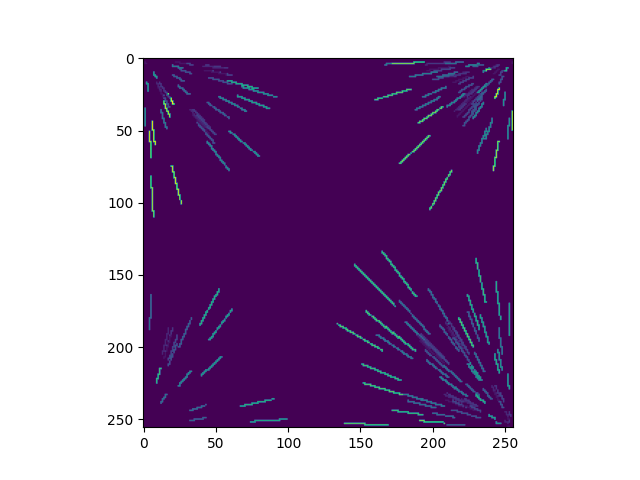

In [15]:
figure()
imshow(blid_grid)

In [16]:
craco_pybind11.ddgrid_reader.krnl_ddgrid_reader_4cu(mainbuf_hw, 
                                     ndm, 
                                     tblk,
                                     nchunk_time, 
                                     nuvrest, 
                                     plan.ddreader_lut, 
                                     do_load_lut, 
                                     outputs[0], 
                                     outputs[1], 
                                     outputs[2], 
                                     outputs[3])

In [17]:
reordered = np.transpose(outputs, [1, 2,0,5, 3,4,6, 7])
#assert reordered.shape == (ndm, nchunk_time, ncu, OUTPUT_NT, nuvrest, NUVWIDE, 2)
reordered = reordered.reshape(ndm, ncu*nchunk_time*OUTPUT_NT, nuvrest*NUVWIDE, 2)

(2, 8, 5168, 2)


<IPython.core.display.Javascript object>


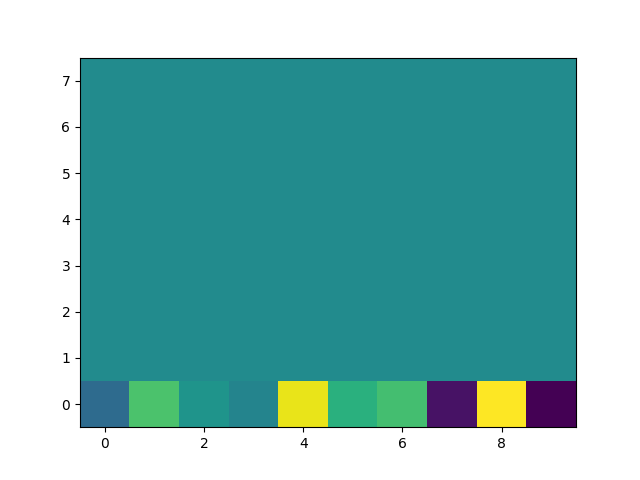

In [18]:
print(reordered.shape)
figure()
imshow(reordered[0,:,:10,0], aspect='auto', origin='lower', interpolation='none')
#print(abs(reordered).sum(), mainbuf.sum())

In [19]:
print(outputs.sum())
print(outputs[1,0,0,:,:,1,0].sum())
for icu in range(outputs.shape[0]):
    print('cu=', icu, outputs[icu, ...].sum())

1916
0
cu= 0 1916
cu= 1 0
cu= 2 0
cu= 3 0


In [20]:
icu=0
load_luts = 1
d_grid = np.zeros((ncu, ndm, nchunk_time, plan.npix, plan.npix, 2), dtype=np.int16)
print(d_grid.sum(), d_grid.shape)
print(nparallel_uvin, ndm, nchunk_time)
print(outputs[icu].shape, outputs[icu].size)
print(outputs[icu].sum())
craco_pybind11.grid.krnl_grid_4cu(ndm,
                     nchunk_time,
                     nparallel_uvin,
                     nparallel_uvout,
                     h_nparallel_uvout,
                     load_luts,
                     lut,
                     outputs[icu],
                     d_grid[icu])
print(d_grid[icu].sum())
print(d_grid.shape)
d = d_grid[0,0,0,:,:,:]


0 (4, 2, 1, 256, 256, 2)
2584 2 1
(2, 1, 646, 4, 2, 2, 2) 41344
1916
1440
(4, 2, 1, 256, 256, 2)


In [21]:
from craft.craco_kernels import FdmtGridder, Imager
gridder = FdmtGridder(None, plan, values)
print(mainbuf.shape)
s = mainbuf.shape
expectshape = (plan.nuvrest, plan.ndout,plan.nt,  plan.nuvwide)
din = np.zeros(expectshape, dtype=np.complex64)
print(din.shape)
#mainbuf has extra uvs in them that we wnt to remove
din.real = mainbuf[:plan.nuvrest,:,0,:,:,0]               
din.imag = mainbuf[:plan.nuvrest,:,0,:,:,1]                              
din = din.transpose([0,2,1,3])
print(din.shape)
print(expectshape)
grid = gridder(0, 0, din)
print(grid.shape)

(664, 186, 11, 256, 8, 2)
(646, 186, 256, 8)
(646, 256, 186, 8)
(646, 186, 256, 8)
(256, 256)


In [22]:
def pgrid(ax):
    ax.plot([0,256],[0,256])
    ax.plot([0,256],[128,128])
    ax.plot([128,128],[0,256])

def complex_compare(grid, d, title1='python', title2='HW'):
    fig, ax = subplots(2,3, sharex=True, sharey=True)
    if np.iscomplexobj(d):
        dr = d.real
        di = d.imag
    else:
        dr = d[...,0]
        di = d[...,1]
    diffr = grid.real - dr
    diffi = grid.imag - di
    #diffr[diffr == 0] = np.nan
    #diffi[diffi == 0] = np.nan

    kwargs = {'aspect':'auto'} #, 'origin':'lower'}
    ax[0,0].imshow(grid.real, **kwargs)
    ax[0,1].imshow(dr, **kwargs)
    ax[0,2].imshow(diffr, **kwargs)
    
    pgrid(ax[0,0])
    pgrid(ax[0,1])


    ax[1,0].imshow(grid.imag, **kwargs)
    ax[1,1].imshow(di, **kwargs)
    ax[1,2].imshow(diffi, **kwargs)

    ax[0,0].set_title(title1)
    ax[0,1].set_title(title2)
    ax[0,2].set_title(f'diff {diffr.std()} {diffi.std()}')

    ax[0,0].set_ylabel('real')
    ax[1,0].set_ylabel('imag')

    fig.set_size_inches([10,6])
    print(f'DIfference {diffr.std()} {diffi.std()}')
    


<IPython.core.display.Javascript object>


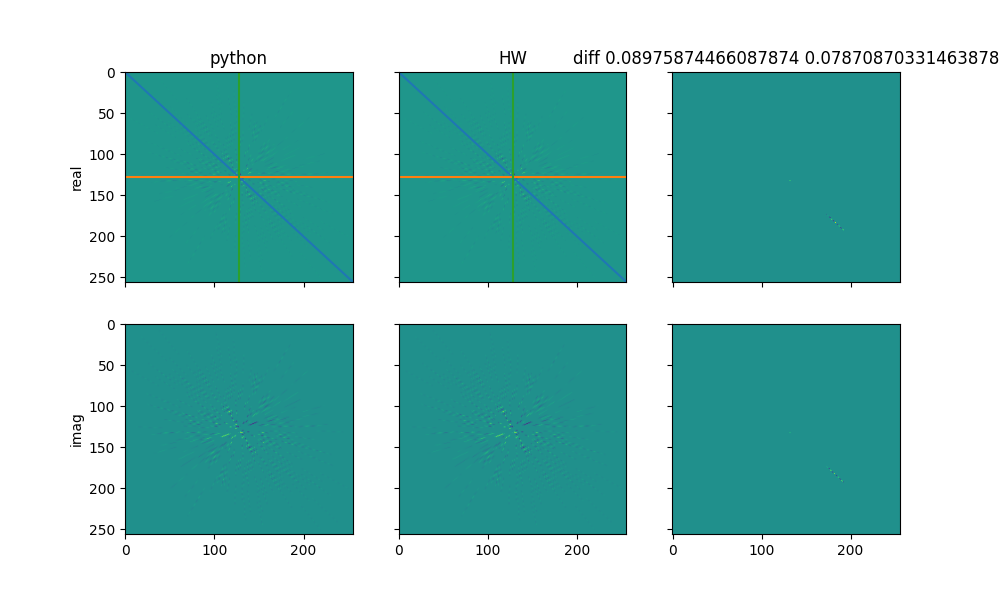

DIfference 0.08975874466087874 0.07870870331463878


In [23]:
dc = d[:,:,0] + 1j*d[:,:,1]
complex_compare(np.fft.fftshift(grid), np.fft.fftshift(dc))

<IPython.core.display.Javascript object>


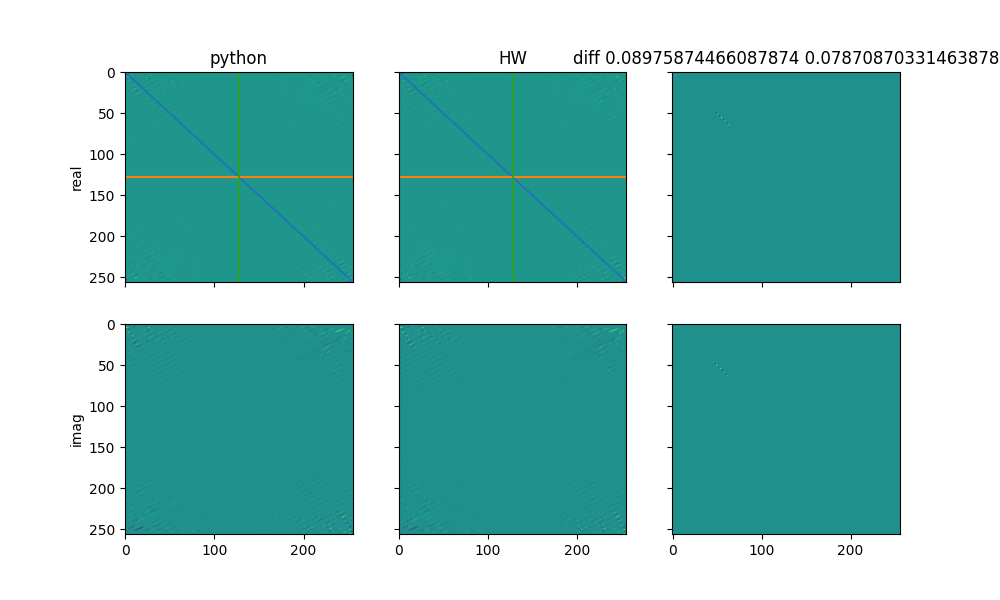

DIfference 0.08975874466087874 0.07870870331463878


In [24]:
complex_compare(grid, dc)

In [25]:
np.where(grid.real != 0)

(array([  1,   1,   2, ..., 254, 255, 255]),
 array([  3,   4,  34, ..., 222, 252, 253]))

In [26]:
np.where(dc.real != 0)

(array([  1,   1,   2, ..., 254, 255, 255]),
 array([  3,   4,  34, ..., 222, 252, 253]))

In [27]:
c = plan.fdmt_plan.runs[0].cells[0]
print(c.uvpix_upper)
print(c.uvpix_lower)

(252, 7)
(4, 249)


In [28]:
from craft.craco import image_fft

def dofft(grid):
    ndm, nchunk, npix, _, _ = grid.shape
    images = np.zeros((ndm, nchunk, npix, npix, 2), dtype=np.float32)
    for dm in range(ndm):
        for chunk in range(nchunk):
            g = np.zeros((npix, npix), dtype=np.complex64)
            g.real = grid[dm, chunk, :, :, 0]
            g.imag = grid[dm, chunk, :, :, 1]
            #img = image_fft(g, scale='prod')
            img = np.fft.fftshift(np.fft.fft2(g))
            images[dm, chunk, :, :, 0] = img.real
            images[dm, chunk, :, :, 1] = img.imag         
    
    return images

In [29]:
d_grid.shape

(4, 2, 1, 256, 256, 2)

In [30]:
np.all(grid.real - d_grid[0,0,0,:,:,0] == 0)

False

In [31]:
np.all(grid.imag - d_grid[0,0,0,:,:,1] == 0)

False

In [32]:
hwimages = dofft(d_grid[0,...])
imgr = Imager(None, plan, values)
#pyimages = imgr(grid)
pyimages = np.fft.fftshift(np.fft.fft2(grid))

<IPython.core.display.Javascript object>


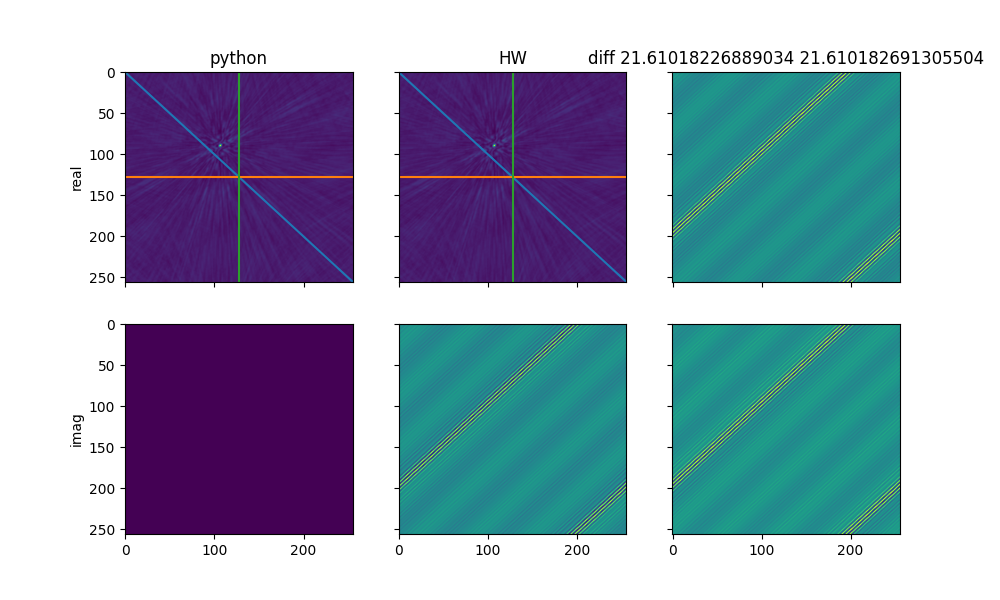

DIfference 21.61018226889034 21.610182691305504


In [33]:
complex_compare(pyimages, hwimages[0,0,...])

<IPython.core.display.Javascript object>


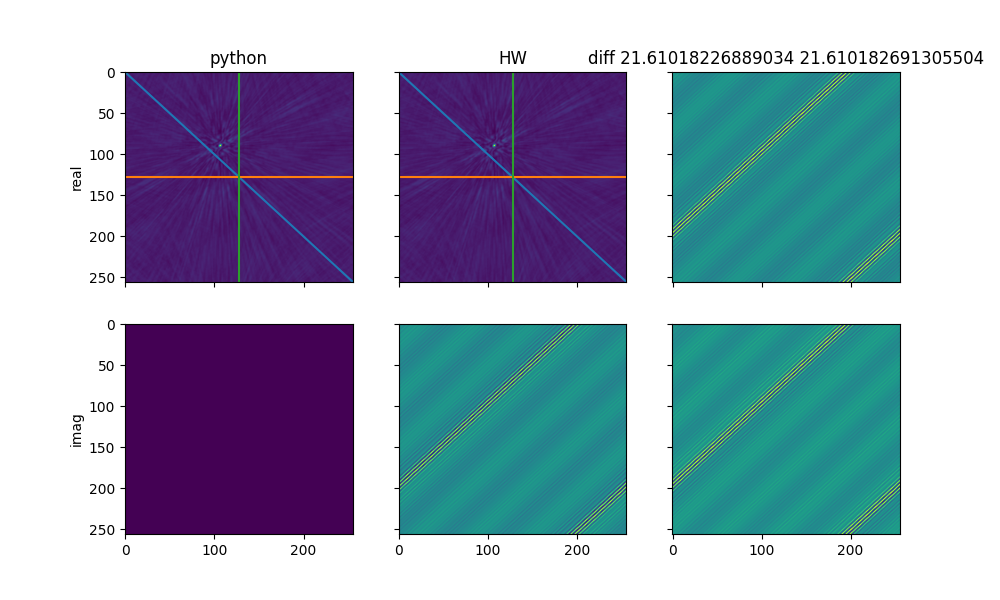

DIfference 21.61018226889034 21.610182691305504


In [34]:
complex_compare(pyimages, hwimages[0,0,...])

In [35]:
grid.sum()

(728+0j)

In [36]:
pyimages.max()

(74866.3807008166+0j)

In [37]:
assert grid.sum() == pyimages.max()

AssertionError: 

In [ ]:
fig, ax = subplots(1,2)
ax[0].imshow(grid.real)
ax[1].imshow(grid.imag)
print(img.imag.max())

In [ ]:
figure()
plot(grid.real[128, :], 'bx', label='python')
plot(d[128,:,0], 'ro', label='HW')
legend()

In [ ]:
sum(grid.real)

In [ ]:
sum(d[:,:,0])

In [ ]:
sum(grid.real != 0)

In [ ]:
sum(d[:,:,0] != 0)

In [ ]:
np.all(grid.real == d[:,:,0])

In [ ]:
len(plan.uvcells)*2

In [ ]:
missingcell = list(filter(lambda cell: cell.uvpix[0] == 62 ,plan.uvcells))
missingcell

In [ ]:
badidx = np.where(diff != 0)
badidx

In [ ]:
for v, u in zip(badidx[0], badidx[1]):
    print(v,u)
    print(list(filter(lambda cell: cell.uvpix == (u, v) or cell.uvpix_upper == (u,v), plan.uvcells)))

In [ ]:
N = 256
g = np.zeros((N,N))
for r in plan.fdmt_plan.runs:
    print(list(filter(lambda cell: cell.uvpix[0] == 62, r.cells)))
    for c in r.cells:
        u,v = c.uvpix
        g[v,u] += 1
        
        
figure()
imshow(g)

In [ ]:
r.cells

In [ ]:
plan.uvcells[0]